In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from glob import glob
from dateutil.relativedelta import relativedelta,TH

In [2]:
glob("/Users/murli/Desktop/Backtesting/sample_data_Jan2019/*")

['/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-09.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-21.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-08.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-22.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-23.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-24.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-18.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-25.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-28.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-14.pkl',
 '/Users/murli/Desktop/Backtesting/sample_data_Jan2019/complete_nfo_data_2019-01-01.pkl',
 '/Users/m

In [3]:
path = pd.DataFrame(glob("/Users/murli/Desktop/Backtesting/sample_data_Jan2019/*"),columns=['location'])
path = path.sort_values(by='location', ascending=True)

In [4]:
path

,location
10,/Users/murli/Desktop/Backtesting/sample_data_J...
15,/Users/murli/Desktop/Backtesting/sample_data_J...
12,/Users/murli/Desktop/Backtesting/sample_data_J...
18,/Users/murli/Desktop/Backtesting/sample_data_J...
16,/Users/murli/Desktop/Backtesting/sample_data_J...
2,/Users/murli/Desktop/Backtesting/sample_data_J...
0,/Users/murli/Desktop/Backtesting/sample_data_J...
19,/Users/murli/Desktop/Backtesting/sample_data_J...
17,/Users/murli/Desktop/Backtesting/sample_data_J...
9,/Users/murli/Desktop/Backtesting/sample_data_J...


In [5]:
path["location"].iloc[0].split("_")[-1].split(".")[0]

'2019-01-01'

In [6]:
path["datadate"] = path["location"].apply(lambda x: x.split("_")[-1].split(".")[0])
path["datadate"] = path["datadate"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [7]:
path.reset_index(drop=True,inplace=True)

In [8]:
path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   location  20 non-null     object        
 1   datadate  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 448.0+ bytes


In [9]:
path

,location,datadate
0,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-01
1,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-02
2,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-03
3,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-04
4,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-07
5,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-08
6,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-09
7,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-10
8,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-11
9,/Users/murli/Desktop/Backtesting/sample_data_J...,2019-01-14


In [10]:
for index, row in path.iterrows():
    data = pd.read_pickle(row["location"])
    break

In [11]:
data

,ticker,instrument_name,instrument_type,expiry_date,strike_price,datetime,date,time,open,high,low,close,volume,open interest,vix_close
0,ACC19FEB1300PE.NFO,ACC,PE,2019-02-28,1300.0,2019-01-01 13:59:00,2019-01-01,13:59:00,4.90,4.90,4.90,4.90,400,0,16.1450
1,ACC19FEB1700CE.NFO,ACC,CE,2019-02-28,1700.0,2019-01-01 13:58:00,2019-01-01,13:58:00,3.90,3.90,3.90,3.90,400,0,16.1525
2,ACC19JAN1360PE.NFO,ACC,PE,2019-01-31,1360.0,2019-01-01 12:48:00,2019-01-01,12:48:00,7.25,7.25,7.25,7.25,400,0,16.1400
3,ACC19JAN1380PE.NFO,ACC,PE,2019-01-31,1380.0,2019-01-01 12:06:00,2019-01-01,12:06:00,10.00,10.00,10.00,10.00,400,800,16.0600
4,ACC19JAN1380PE.NFO,ACC,PE,2019-01-31,1380.0,2019-01-01 12:20:00,2019-01-01,12:20:00,10.80,10.80,10.80,10.80,400,1200,16.0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205270,ZEEL-II.NFO,ZEEL,FUT,2019-02-28,0.0,2019-01-01 15:12:00,2019-01-01,15:12:00,483.05,483.05,483.05,483.05,1300,39000,15.3475
205271,ZEEL-II.NFO,ZEEL,FUT,2019-02-28,0.0,2019-01-01 15:19:00,2019-01-01,15:19:00,483.05,484.30,483.05,484.30,2600,39000,15.2925
205272,ZEEL-II.NFO,ZEEL,FUT,2019-02-28,0.0,2019-01-01 15:26:00,2019-01-01,15:26:00,484.30,484.40,484.30,484.40,1300,39000,15.2450
205273,ZEEL-III.NFO,ZEEL,FUT,2019-03-28,0.0,2019-01-01 15:19:00,2019-01-01,15:19:00,486.00,486.30,486.00,486.30,2600,0,15.2925


In [12]:
trade_log = pd.DataFrame(columns=['Entry_date_time', 'Future_price', 'ATM', 'Days_to_expiry', 
                                  'CE_symbol', 'CE_entry_price', 'CE_exit_price', 'CE_exit_datetime', 'CE_pnl',
                                'PE_symbol', 'PE_entry_price', 'PE_exit_price', 'PE_exit_datetime', 'PE_pnl',
                                 'Total_pnl'])

In [13]:
trade_log

,Entry_date_time,Future_price,ATM,Days_to_expiry,CE_symbol,CE_entry_price,CE_exit_price,CE_exit_datetime,CE_pnl,PE_symbol,PE_entry_price,PE_exit_price,PE_exit_datetime,PE_pnl,Total_pnl


In [14]:
for index, row in path.iterrows():
    data = pd.read_pickle(row["location"])
    break

In [15]:
entry_datetime = datetime.datetime.combine(row["datadate"].date(), datetime.time(9,20))
exit_datetime = datetime.datetime.combine(row["datadate"].date(), datetime.time(15,10))

In [16]:
set(data["instrument_name"])

{'ACC',
 'ADANIENT',
 'ADANIPORTS',
 'ADANIPOWER',
 'AJANTPHARM',
 'ALBK',
 'AMARAJABAT',
 'AMBUJACEM',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ARVIND',
 'ASHOKLEY',
 'ASIANPAINT',
 'AUROPHARMA',
 'AXISBANK',
 'BAJAJ',
 'BAJAJ-AUTO',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BALKRISIND',
 'BANKBARODA',
 'BANKINDIA',
 'BANKNIFTY',
 'BATAINDIA',
 'BEL',
 'BEML',
 'BERGEPAINT',
 'BHARATFIN',
 'BHARATFORG',
 'BHARTIARTL',
 'BHEL',
 'BIOCON',
 'BOSCHLTD',
 'BPCL',
 'BRITANNIA',
 'CADILAHC',
 'CANBK',
 'CANFINHOME',
 'CASTROLIND',
 'CEATLTD',
 'CENTURYTEX',
 'CESC',
 'CGPOWER',
 'CHENNPETRO',
 'CHOLAFIN',
 'CIPLA',
 'COALINDIA',
 'COLPAL',
 'CONCOR',
 'CUMMINSIND',
 'DABUR',
 'DCBBANK',
 'DHFL',
 'DISHTV',
 'DIVISLAB',
 'DLF',
 'DRREDDY',
 'EICHERMOT',
 'ENGINERSIN',
 'EQUITAS',
 'ESCORTS',
 'EXIDEIND',
 'FEDERALBNK',
 'GAIL',
 'GLENMARK',
 'GMRINFRA',
 'GODFRYPHLP',
 'GODREJCP',
 'GODREJIND',
 'GRASIM',
 'GSFC',
 'HAVELLS',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HEROMOTOCO',
 'HEXAWARE',
 'HINDALCO',
 'HINDPETR

In [17]:
data["expiry_type"] = np.where(
    data["instrument_type"] == "FUT",
    data["ticker"].apply(lambda x: x.split("-")[-1].split(".")[0]),
    ""
)

In [18]:
data

,ticker,instrument_name,instrument_type,expiry_date,strike_price,datetime,date,time,open,high,low,close,volume,open interest,vix_close,expiry_type
0,ACC19FEB1300PE.NFO,ACC,PE,2019-02-28,1300.0,2019-01-01 13:59:00,2019-01-01,13:59:00,4.90,4.90,4.90,4.90,400,0,16.1450,
1,ACC19FEB1700CE.NFO,ACC,CE,2019-02-28,1700.0,2019-01-01 13:58:00,2019-01-01,13:58:00,3.90,3.90,3.90,3.90,400,0,16.1525,
2,ACC19JAN1360PE.NFO,ACC,PE,2019-01-31,1360.0,2019-01-01 12:48:00,2019-01-01,12:48:00,7.25,7.25,7.25,7.25,400,0,16.1400,
3,ACC19JAN1380PE.NFO,ACC,PE,2019-01-31,1380.0,2019-01-01 12:06:00,2019-01-01,12:06:00,10.00,10.00,10.00,10.00,400,800,16.0600,
4,ACC19JAN1380PE.NFO,ACC,PE,2019-01-31,1380.0,2019-01-01 12:20:00,2019-01-01,12:20:00,10.80,10.80,10.80,10.80,400,1200,16.0700,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205270,ZEEL-II.NFO,ZEEL,FUT,2019-02-28,0.0,2019-01-01 15:12:00,2019-01-01,15:12:00,483.05,483.05,483.05,483.05,1300,39000,15.3475,II
205271,ZEEL-II.NFO,ZEEL,FUT,2019-02-28,0.0,2019-01-01 15:19:00,2019-01-01,15:19:00,483.05,484.30,483.05,484.30,2600,39000,15.2925,II
205272,ZEEL-II.NFO,ZEEL,FUT,2019-02-28,0.0,2019-01-01 15:26:00,2019-01-01,15:26:00,484.30,484.40,484.30,484.40,1300,39000,15.2450,II
205273,ZEEL-III.NFO,ZEEL,FUT,2019-03-28,0.0,2019-01-01 15:19:00,2019-01-01,15:19:00,486.00,486.30,486.00,486.30,2600,0,15.2925,III


In [19]:
current_month_exp = "I"
instrument = "BANKNIFTY"
future_data = data[(data["instrument_name"]==instrument) & (data["instrument_type"]=="FUT") & (data["expiry_type"]==current_month_exp)]

In [20]:
future_data.reset_index(drop=True,inplace=True)

In [21]:
future_data

,ticker,instrument_name,instrument_type,expiry_date,strike_price,datetime,date,time,open,high,low,close,volume,open interest,vix_close,expiry_type
0,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 09:15:00,2019-01-01,09:15:00,27300.20,27368.10,27300.20,27314.95,18300,1414860,16.1400,I
1,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 09:16:00,2019-01-01,09:16:00,27317.75,27322.10,27289.95,27299.35,11980,1414860,16.1425,I
2,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 09:17:00,2019-01-01,09:17:00,27298.60,27309.00,27296.25,27307.00,10760,1414860,16.1350,I
3,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 09:18:00,2019-01-01,09:18:00,27307.00,27308.75,27277.00,27282.00,13620,1424420,16.2600,I
4,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 09:19:00,2019-01-01,09:19:00,27282.00,27282.00,27257.50,27264.45,16040,1424420,16.2925,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 15:26:00,2019-01-01,15:26:00,27524.10,27526.00,27518.90,27519.20,20060,1670180,15.2450,I
372,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 15:27:00,2019-01-01,15:27:00,27520.00,27523.00,27518.55,27520.00,24900,1662920,15.2600,I
373,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 15:28:00,2019-01-01,15:28:00,27520.80,27531.00,27520.30,27523.00,25380,1662920,15.2525,I
374,BANKNIFTY-I.NFO,BANKNIFTY,FUT,2019-01-31,0.0,2019-01-01 15:29:00,2019-01-01,15:29:00,27521.00,27532.00,27520.95,27530.00,30520,1662920,15.2450,I


In [22]:
atm = future_data[future_data["datetime"]==entry_datetime]["open"].iloc[0]

In [23]:
base_price = 100
atm = base_price * round(atm/base_price)

In [24]:
atm

27300

In [25]:
nearest_expiry = row["datadate"].date()+relativedelta(weekday=TH)


In [26]:
ce_data=data[(data['instrument_type']=='CE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry)|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=1))|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=2)))]
ce_data.reset_index(drop=True,inplace=True)
ce_data

,ticker,instrument_name,instrument_type,expiry_date,strike_price,datetime,date,time,open,high,low,close,volume,open interest,vix_close,expiry_type
0,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 09:15:00,2019-01-01,09:15:00,130.10,143.70,117.75,125.30,60160,582900,16.1400,
1,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 09:16:00,2019-01-01,09:16:00,124.85,127.15,117.00,117.85,53120,582900,16.1425,
2,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 09:17:00,2019-01-01,09:17:00,118.00,121.95,116.85,120.00,33620,582900,16.1350,
3,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 09:18:00,2019-01-01,09:18:00,120.70,120.75,107.85,108.90,80540,634500,16.2600,
4,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 09:19:00,2019-01-01,09:19:00,109.15,109.50,99.55,101.05,70160,634500,16.2925,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 15:25:00,2019-01-01,15:25:00,199.90,200.00,197.65,199.10,38420,410000,15.2675,
371,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 15:26:00,2019-01-01,15:26:00,199.70,200.00,197.60,198.05,25740,410000,15.2450,
372,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 15:27:00,2019-01-01,15:27:00,198.60,201.00,197.95,200.00,26920,389060,15.2600,
373,BANKNIFTY03JAN1927300CE.NFO,BANKNIFTY,CE,2019-01-03,27300.0,2019-01-01 15:28:00,2019-01-01,15:28:00,200.85,200.85,199.45,200.00,21460,389060,15.2525,


In [27]:
pe_data=data[(data['instrument_type']=='PE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry)|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=1))|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=2)))]
pe_data.reset_index(drop=True,inplace=True)
pe_data

,ticker,instrument_name,instrument_type,expiry_date,strike_price,datetime,date,time,open,high,low,close,volume,open interest,vix_close,expiry_type
0,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 09:15:00,2019-01-01,09:15:00,191.70,208.70,160.90,198.50,22120,200500,16.1400,
1,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 09:16:00,2019-01-01,09:16:00,198.90,214.00,195.95,214.00,15080,200500,16.1425,
2,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 09:17:00,2019-01-01,09:17:00,213.55,215.60,203.35,206.40,12180,200500,16.1350,
3,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 09:18:00,2019-01-01,09:18:00,206.00,223.50,205.00,219.25,16960,212400,16.2600,
4,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 09:19:00,2019-01-01,09:19:00,219.20,229.90,219.20,229.60,12220,212400,16.2925,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 15:26:00,2019-01-01,15:26:00,76.55,78.00,76.45,77.65,44640,463700,15.2450,
371,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 15:27:00,2019-01-01,15:27:00,77.55,78.30,76.55,76.75,38700,453640,15.2600,
372,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 15:28:00,2019-01-01,15:28:00,77.10,77.55,76.55,77.00,37600,453640,15.2525,
373,BANKNIFTY03JAN1927300PE.NFO,BANKNIFTY,PE,2019-01-03,27300.0,2019-01-01 15:29:00,2019-01-01,15:29:00,76.50,77.75,75.15,76.00,52280,453640,15.2450,


In [28]:
ce_symbol = ce_data["ticker"].iloc[0]
pe_symbol = pe_data["ticker"].iloc[0]

In [29]:
future_price = future_data[future_data["datetime"]==entry_datetime]["open"].iloc[0]
future_price

27260.0

In [30]:
ce_entry_price = ce_data[ce_data["datetime"]==entry_datetime]["close"].iloc[0]
pe_entry_price = pe_data[ce_data["datetime"]==entry_datetime]["close"].iloc[0]

In [31]:
future_data = future_data[["datetime","close"]].set_index(["datetime"])
ce_data = ce_data[["datetime","close"]].set_index(["datetime"])
pe_data = pe_data[["datetime","close"]].set_index(["datetime"])


In [32]:
intraday_data = pd.concat([future_data,ce_data,pe_data],axis=1)

In [33]:
intraday_data.columns = ["future_close","ce_close","pe_close"]

In [34]:
intraday_data=intraday_data.ffill()

In [35]:
intraday_data.isnull().sum()

future_close    0
ce_close        0
pe_close        0
dtype: int64

In [36]:
intraday_data.reset_index(inplace=True)

In [37]:
entry_datetime_index = intraday_data[intraday_data["datetime"]==entry_datetime].index[0]
exit_datetime_index = intraday_data[intraday_data["datetime"]==exit_datetime].index[0]

In [38]:
intraday_data=intraday_data[entry_datetime_index:exit_datetime_index+1]


In [39]:
intraday_data

,datetime,future_close,ce_close,pe_close
5,2019-01-01 09:20:00,27265.00,100.00,225.60
6,2019-01-01 09:21:00,27273.30,102.70,222.15
7,2019-01-01 09:22:00,27267.00,101.40,226.70
8,2019-01-01 09:23:00,27253.05,97.30,233.15
9,2019-01-01 09:24:00,27217.05,84.85,257.50
...,...,...,...,...
351,2019-01-01 15:06:00,27486.85,176.70,97.55
352,2019-01-01 15:07:00,27490.50,181.30,96.70
353,2019-01-01 15:08:00,27488.45,178.40,97.35
354,2019-01-01 15:09:00,27501.20,186.45,89.60


In [40]:
stop_loss = 0.20
ce_stop_loss=ce_entry_price+ce_entry_price*stop_loss
pe_stop_loss=pe_entry_price+pe_entry_price*stop_loss

In [41]:
pe_stop_loss

270.72

In [42]:
ce_stop_loss_counter=0
pe_stop_loss_counter=0
ce_exit_datetime=''
pe_exit_datetime=''
ce_exit_price=0
pe_exit_price=0
ce_pnl=0
pe_pnl=0
pnl=0

In [43]:
for index, row in intraday_data.iterrows():
            ce_ltp=row['ce_close']
            pe_ltp=row['pe_close']

            if (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0) & (row['datetime']==exit_datetime):
                ce_pnl=ce_entry_price-ce_ltp
                pe_pnl=pe_entry_price-pe_ltp
                ce_stop_loss_counter=1
                pe_stop_loss_counter=1
                ce_exit_datetime=row['datetime']
                pe_exit_datetime=row['datetime']
                ce_exit_price=ce_ltp
                pe_exit_price=pe_ltp
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('CE & PE did not hit SL, both exit at 15:10')
                pnl=ce_pnl+pe_pnl
                break 

            elif (ce_ltp>=ce_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                ce_pnl=ce_entry_price-ce_stop_loss
                pe_pnl=pe_entry_price-pe_ltp
                ce_stop_loss_counter=1
                ce_exit_datetime=row['datetime']
                ce_exit_price=ce_stop_loss
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('CE SL hit')
                pnl=ce_pnl+pe_pnl


            elif (pe_ltp>=pe_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                ce_pnl=ce_entry_price-ce_ltp
                pe_pnl=pe_entry_price-pe_stop_loss
                pe_stop_loss_counter=1
                pe_exit_datetime=row['datetime']
                pe_exit_price=pe_stop_loss
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('PE SL hit')
                pnl=ce_pnl+pe_pnl

            elif (ce_stop_loss_counter==1) & (pe_stop_loss_counter==0):
                if (pe_ltp>=pe_stop_loss) & (row['datetime']<exit_datetime):
                    pe_pnl=pe_entry_price-pe_stop_loss
                    pe_stop_loss_counter=1
                    pe_exit_datetime=row['datetime']
                    pe_exit_price=pe_stop_loss
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('PE SL hit')
                    pnl=ce_pnl+pe_pnl
                    break
                elif (row['datetime']==exit_datetime):
                    pe_pnl=pe_entry_price-pe_ltp
                    pe_stop_loss_counter=1
                    pe_exit_datetime=row['datetime']
                    pe_exit_price=pe_ltp
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('PE exit at 15:10')
                    pnl=ce_pnl+pe_pnl
                    break     

            elif (pe_stop_loss_counter==1) & (ce_stop_loss_counter==0):
                if (ce_ltp>=ce_stop_loss) & (row['datetime']<exit_datetime):
                    ce_pnl=ce_entry_price-ce_stop_loss
                    ce_stop_loss_counter=1
                    ce_exit_datetime=row['datetime']
                    ce_exit_price=ce_stop_loss
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('CE SL hit')
                    pnl=ce_pnl+pe_pnl
                    break
                elif (row['datetime']==exit_datetime):
                    ce_pnl=ce_entry_price-ce_ltp
                    ce_stop_loss_counter=1
                    ce_exit_datetime=row['datetime']
                    ce_exit_price=ce_ltp
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('CE exit at 15:10')
                    pnl=ce_pnl+pe_pnl
                    break

            elif ((ce_stop_loss_counter==0) & (pe_stop_loss_counter==0) | (ce_stop_loss_counter==1) & (pe_stop_loss_counter==0) | (ce_stop_loss_counter==0) & (pe_stop_loss_counter==1) | (ce_stop_loss_counter==1) & (pe_stop_loss_counter==1)) or (row['datetime']<exit_datetime):
                ce_pnl=ce_entry_price-ce_ltp
                pe_pnl=pe_entry_price-pe_ltp
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                pnl=ce_pnl+pe_pnl

PE SL hit
CE SL hit


In [44]:
intraday_data

,datetime,future_close,ce_close,pe_close,ce_pnl,pe_pnl
5,2019-01-01 09:20:00,27265.00,100.00,225.60,0.00,0.00
6,2019-01-01 09:21:00,27273.30,102.70,222.15,-2.70,3.45
7,2019-01-01 09:22:00,27267.00,101.40,226.70,-1.40,-1.10
8,2019-01-01 09:23:00,27253.05,97.30,233.15,2.70,-7.55
9,2019-01-01 09:24:00,27217.05,84.85,257.50,15.15,-31.90
...,...,...,...,...,...,...
351,2019-01-01 15:06:00,27486.85,176.70,97.55,NaN,NaN
352,2019-01-01 15:07:00,27490.50,181.30,96.70,NaN,NaN
353,2019-01-01 15:08:00,27488.45,178.40,97.35,NaN,NaN
354,2019-01-01 15:09:00,27501.20,186.45,89.60,NaN,NaN


In [45]:
for index, row in path.iterrows():
    try:
        print(index)
        data=pd.read_pickle(row['location'])
    
        entry_datetime=datetime.datetime.combine(row['datadate'].date(),datetime.time(9,20))
        exit_dateitme=datetime.datetime.combine(row['datadate'].date(),datetime.time(15,10))


        data['expiry_type']=np.where((data['instrument_type']=='FUT'),(data['ticker'].apply(lambda x:x.split('-')[-1].split('.')[0])),"")
        current_month_exp= 'I' 
        instrument='BANKNIFTY'
        future_data=data[(data['instrument_type']=='FUT') & (data['instrument_name']==instrument) & (data['expiry_type']==current_month_exp)]
        future_data.reset_index(drop=True,inplace=True)
        atm=future_data[future_data['datetime']==entry_datetime]['open'].iloc[0]
        base_price=100
        atm=base_price*round(atm/base_price)


        nearest_expiry=row['datadate'].date()+relativedelta(weekday=TH)
        ce_data=data[(data['instrument_type']=='CE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry)|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=1))|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=2)))]
        ce_data.reset_index(drop=True,inplace=True)
        pe_data=data[(data['instrument_type']=='PE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry)|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=1))|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=2)))]
        pe_data.reset_index(drop=True,inplace=True)


        ce_symbol=ce_data['ticker'].iloc[0]
        pe_symbol=pe_data['ticker'].iloc[0]
        future_price= future_data[future_data['datetime']==entry_datetime]['open'].iloc[0]
        ce_entry_price= ce_data[ce_data['datetime']==entry_datetime]['close'].iloc[0]
        pe_entry_price=pe_data[pe_data['datetime']==entry_datetime]['close'].iloc[0]


        future_data=future_data[['datetime','close']].set_index(['datetime'])
        ce_data=ce_data[['datetime','close']].set_index(['datetime'])
        pe_data=pe_data[['datetime','close']].set_index(['datetime'])
        intraday_data=pd.concat([future_data,ce_data,pe_data],axis=1)
        intraday_data.columns=['future_close','ce_close','pe_close']
        intraday_data=intraday_data.ffill()
        intraday_data.reset_index(inplace=True)
        entry_datetime_index=intraday_data[intraday_data['datetime']==entry_datetime].index[0]
        exit_datetime_index=intraday_data[intraday_data['datetime']==exit_dateitme].index[0]
        intraday_data=intraday_data[entry_datetime_index:exit_datetime_index+1]
        intraday_data['ce_pnl']=0
        intraday_data['pe_pnl']=0
        intraday_data.reset_index(drop=True,inplace=True)


        stop_loss= 20/100
        ce_stop_loss=ce_entry_price+ce_entry_price*stop_loss
        pe_stop_loss=pe_entry_price+pe_entry_price*stop_loss


        ce_stop_loss_counter=0
        pe_stop_loss_counter=0
        ce_exit_datetime=''
        pe_exit_datetime=''
        ce_exit_price=0
        pe_exit_price=0
        ce_pnl=0
        pe_pnl=0
        pnl=0

        for index, row in intraday_data.iterrows():
            ce_ltp=row['ce_close']
            pe_ltp=row['pe_close']

            if (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0) & (row['datetime']==exit_datetime):
                ce_pnl=ce_entry_price-ce_ltp
                pe_pnl=pe_entry_price-pe_ltp
                ce_stop_loss_counter=1
                pe_stop_loss_counter=1
                ce_exit_datetime=row['datetime']
                pe_exit_datetime=row['datetime']
                ce_exit_price=ce_ltp
                pe_exit_price=pe_ltp
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('CE & PE did not hit SL, both exit at 15:10')
                pnl=ce_pnl+pe_pnl
                break 

            elif (ce_ltp>=ce_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                ce_pnl=ce_entry_price-ce_stop_loss
                pe_pnl=pe_entry_price-pe_ltp
                ce_stop_loss_counter=1
                ce_exit_datetime=row['datetime']
                ce_exit_price=ce_stop_loss
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('CE SL hit')
                pnl=ce_pnl+pe_pnl


            elif (pe_ltp>=pe_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                ce_pnl=ce_entry_price-ce_ltp
                pe_pnl=pe_entry_price-pe_stop_loss
                pe_stop_loss_counter=1
                pe_exit_datetime=row['datetime']
                pe_exit_price=pe_stop_loss
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('PE SL hit')
                pnl=ce_pnl+pe_pnl

            elif (ce_stop_loss_counter==1) & (pe_stop_loss_counter==0):
                if (pe_ltp>=pe_stop_loss) & (row['datetime']<exit_datetime):
                    pe_pnl=pe_entry_price-pe_stop_loss
                    pe_stop_loss_counter=1
                    pe_exit_datetime=row['datetime']
                    pe_exit_price=pe_stop_loss
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('PE SL hit')
                    pnl=ce_pnl+pe_pnl
                    break
                elif (row['datetime']==exit_datetime):
                    pe_pnl=pe_entry_price-pe_ltp
                    pe_stop_loss_counter=1
                    pe_exit_datetime=row['datetime']
                    pe_exit_price=pe_ltp
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('PE exit at 15:10')
                    pnl=ce_pnl+pe_pnl
                    break     

            elif (pe_stop_loss_counter==1) & (ce_stop_loss_counter==0):
                if (ce_ltp>=ce_stop_loss) & (row['datetime']<exit_datetime):
                    ce_pnl=ce_entry_price-ce_stop_loss
                    ce_stop_loss_counter=1
                    ce_exit_datetime=row['datetime']
                    ce_exit_price=ce_stop_loss
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('CE SL hit')
                    pnl=ce_pnl+pe_pnl
                    break
                elif (row['datetime']==exit_datetime):
                    ce_pnl=ce_entry_price-ce_ltp
                    ce_stop_loss_counter=1
                    ce_exit_datetime=row['datetime']
                    ce_exit_price=ce_ltp
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('CE exit at 15:10')
                    pnl=ce_pnl+pe_pnl
                    break

            elif ((ce_stop_loss_counter==0) & (pe_stop_loss_counter==0) | (ce_stop_loss_counter==1) & (pe_stop_loss_counter==0) | (ce_stop_loss_counter==0) & (pe_stop_loss_counter==1) | (ce_stop_loss_counter==1) & (pe_stop_loss_counter==1)) or (row['datetime']<exit_datetime):
                ce_pnl=ce_entry_price-ce_ltp
                pe_pnl=pe_entry_price-pe_ltp
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                pnl=ce_pnl+pe_pnl



        new_row = pd.DataFrame({
            'Entry_date_time': [entry_datetime],
            'Future_price': [future_price],
            'ATM': [atm], 
            'Days_to_expiry': [(nearest_expiry - entry_datetime.date()).days],
            'CE_symbol': [ce_symbol],
            'CE_entry_price': [ce_entry_price],
            'CE_exit_price': [ce_exit_price],
            'CE_exit_datetime': [ce_exit_datetime],
            'CE_pnl': [ce_pnl],
            'PE_symbol': [pe_symbol],
            'PE_entry_price': [pe_entry_price],
            'PE_exit_price': [pe_exit_price],
            'PE_exit_datetime': [pe_exit_datetime],
            'PE_pnl': [pe_pnl], 
            'Total_pnl': [pnl]
        })

        trade_log = pd.concat([trade_log, new_row], ignore_index=True)
    except Exception as e:
        print(e)
        print(row['location'])

0
PE SL hit
CE SL hit
1
PE SL hit
2
CE SL hit
3
PE SL hit
4
PE SL hit
5
CE SL hit
6
PE SL hit
7
PE SL hit
8
PE SL hit
9
10
CE SL hit
11
CE SL hit
12
PE SL hit
13
PE SL hit
14
CE SL hit
15
16
PE SL hit
17
PE SL hit
18
PE SL hit
19
PE SL hit


In [46]:
trade_log

,Entry_date_time,Future_price,ATM,Days_to_expiry,CE_symbol,CE_entry_price,CE_exit_price,CE_exit_datetime,CE_pnl,PE_symbol,PE_entry_price,PE_exit_price,PE_exit_datetime,PE_pnl,Total_pnl
0,2019-01-01 09:20:00,27260.00,27300,2,BANKNIFTY03JAN1927300CE.NFO,100.00,120.00,2019-01-01 14:31:00,-20.00,BANKNIFTY03JAN1927300PE.NFO,225.60,270.72,2019-01-01 09:54:00,-45.12,-65.12
1,2019-01-02 09:20:00,27427.00,27400,1,BANKNIFTY03JAN1927400CE.NFO,99.05,0.00,,33.05,BANKNIFTY03JAN1927400PE.NFO,157.55,189.06,2019-01-02 09:35:00,-31.51,1.54
2,2019-01-03 09:20:00,27241.10,27200,0,BANKNIFTY03JAN1927200CE.NFO,48.10,57.72,2019-01-03 09:38:00,-9.62,BANKNIFTY03JAN1927200PE.NFO,135.30,0.00,,29.00,19.38
3,2019-01-04 09:20:00,27177.30,27200,6,BANKNIFTY10JAN1927200CE.NFO,179.60,0.00,,47.10,BANKNIFTY10JAN1927200PE.NFO,283.05,339.66,2019-01-04 09:45:00,-56.61,-9.51
4,2019-01-07 09:20:00,27508.20,27500,3,BANKNIFTY10JAN1927500CE.NFO,137.75,0.00,,38.75,BANKNIFTY10JAN1927500PE.NFO,204.00,244.80,2019-01-07 14:45:00,-40.80,-2.05
5,2019-01-08 09:20:00,27327.65,27300,2,BANKNIFTY10JAN1927300CE.NFO,110.30,132.36,2019-01-08 09:49:00,-22.06,BANKNIFTY10JAN1927300PE.NFO,199.50,0.00,,30.85,8.79
6,2019-01-09 09:20:00,27709.45,27700,1,BANKNIFTY10JAN1927700CE.NFO,81.85,0.00,,19.55,BANKNIFTY10JAN1927700PE.NFO,167.60,201.12,2019-01-09 10:05:00,-33.52,-13.97
7,2019-01-10 09:20:00,27702.45,27700,0,BANKNIFTY10JAN1927700CE.NFO,44.15,0.00,,19.65,BANKNIFTY10JAN1927700PE.NFO,120.15,144.18,2019-01-10 09:37:00,-24.03,-4.38
8,2019-01-11 09:20:00,27665.50,27700,6,BANKNIFTY17JAN1927700CE.NFO,172.10,0.00,,46.10,BANKNIFTY17JAN1927700PE.NFO,259.00,310.80,2019-01-11 10:44:00,-51.80,-5.70
9,2019-01-14 09:20:00,27397.90,27400,3,BANKNIFTY17JAN1927400CE.NFO,141.30,0.00,,22.80,BANKNIFTY17JAN1927400PE.NFO,221.90,0.00,,5.90,28.70


In [47]:
file_name = 'tradelog_920.csv'
trade_log.to_csv(file_name, index=False)

In [48]:
trade_log["Total_pnl"].sum()*50

3254.9999999999955

In [49]:
total_pnl = trade_log["Total_pnl"].sum()*50
average_pnl = trade_log["Total_pnl"].mean()*50
std_dev_pnl = trade_log["Total_pnl"].std()*50
sharpe_ratio = average_pnl / std_dev_pnl

print(f"Total PnL: {total_pnl}")
print(f"Average Daily PnL: {average_pnl}")
print(f"Standard Deviation of PnL: {std_dev_pnl}")
print(f"Sharpe Ratio: {sharpe_ratio}")
rolling_max = (trade_log["Total_pnl"].cumsum()*50).cummax()
drawdown = trade_log["Total_pnl"].cumsum()*50 - rolling_max
max_drawdown = drawdown.min()
print("Max Drowdown: {}".format(max_drawdown))

Total PnL: 3254.9999999999955
Average Daily PnL: 162.74999999999977
Standard Deviation of PnL: 1193.4806295696196
Sharpe Ratio: 0.13636584957284892
Max Drowdown: -1522.0


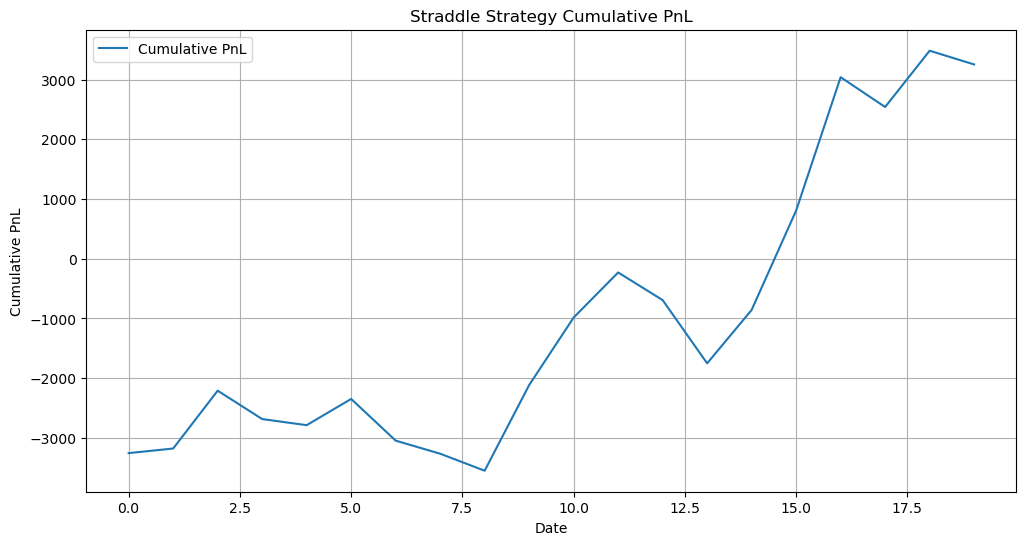

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(trade_log["Total_pnl"].cumsum()*50, label='Cumulative PnL')
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Straddle Strategy Cumulative PnL')
plt.legend()
plt.grid(True)
plt.show()